In [6]:
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import torch.optim
from agent.agents import WaterworldAgent, DisjointWaterWorldAgent
from agent.evolve import EvoController
import numpy as np
import pickle

In [7]:
agent = DisjointWaterWorldAgent(num_nodes=4, spatial=7, channels=3, input_channels=2)
print(agent.input_channels)
obs_data = np.loadtxt("/Users/loggiasr/Projects/ReIntAI/models/pretrain_data/obs_data.txt")
reward_data = np.loadtxt("/Users/loggiasr/Projects/ReIntAI/models/pretrain_data/returns.txt")
print(obs_data.shape)
print(reward_data.shape)

2
(1752000, 102)
(1752000,)


In [3]:
from sklearn.linear_model import LinearRegression
glm = LinearRegression(fit_intercept=False)
glm.fit(obs_data, reward_data)
# res = glm.predict(obs_data)
# print(reward_data - res)
agent.value_decoder = torch.nn.Parameter(torch.from_numpy(glm.coef_).float().reshape(-1, 1))
# agent.value_decoder.bias = torch.nn.Parameter(torch.from_numpy(np.array([glm.intercept_])).float().flatten())

In [8]:
agent.pretrain_agent_input(5000, obs_data)

epoch 0 loss 0.9778614044189453 reg 0.7983441352844238
epoch 1 loss 0.9752036929130554 reg 0.797345757484436
epoch 2 loss 0.9760122299194336 reg 0.7963481545448303
epoch 3 loss 0.9761210680007935 reg 0.795351505279541
epoch 4 loss 0.9750460386276245 reg 0.7943547964096069
epoch 5 loss 0.9751197695732117 reg 0.7933586239814758
epoch 6 loss 0.9754310250282288 reg 0.7923635840415955
epoch 7 loss 0.9745762348175049 reg 0.7913691401481628
epoch 8 loss 0.9728225469589233 reg 0.7903754711151123
epoch 9 loss 0.9739373922348022 reg 0.7893829345703125
epoch 10 loss 0.9695304036140442 reg 0.7883912324905396
epoch 11 loss 0.9724738001823425 reg 0.7874001264572144
epoch 12 loss 0.9724832773208618 reg 0.7864099740982056
epoch 13 loss 0.9715085625648499 reg 0.7854210734367371
epoch 14 loss 0.9730494618415833 reg 0.7844334244728088
epoch 15 loss 0.9715566635131836 reg 0.7834458947181702
epoch 16 loss 0.9705779552459717 reg 0.7824593782424927
epoch 17 loss 0.9709891676902771 reg 0.78147292137146
epoch 

In [6]:
fig, axs = plt.subplots(2)
axs[0].plot(loss)
axs[1].plot(val_loss)
plt.show()

In [9]:
with open("/Users/loggiasr/Projects/ReIntAI/models/wworld_pretrain7.pkl", "wb") as f:
    pickle.dump(agent.input_encoder, f)
with open("/Users/loggiasr/Projects/ReIntAI/models/wworld_val_pretrain7.pkl", "wb") as f:
    pickle.dump(agent.value_decoder, f)

In [2]:
agent = WaterworldAgent(num_nodes=4, spatial=7, channels=3, input_channels=3)
with open("/Users/loggiasr/Projects/ReIntAI/models/wworld_pretrain7.pkl", "rb") as f:
    in_enc = pickle.load(f)
agent.input_encoder = in_enc

In [11]:
with open("/Users/loggiasr/Projects/ReIntAI/models/wworld_1.pkl", "rb") as f:
    evo = pickle.load(f)

In [3]:
evo = EvoController(seed_agent=agent, epochs=5, num_base=5)

In [ ]:
evo.controller(mp=False)

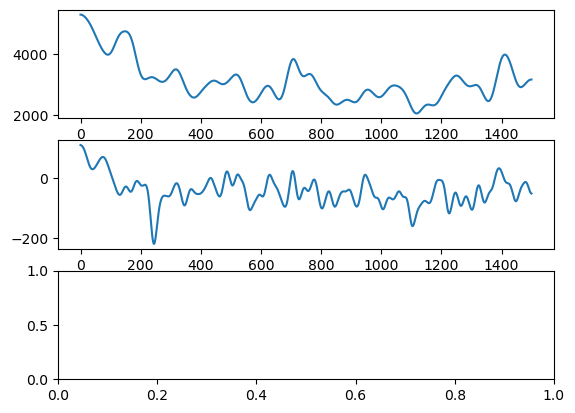

In [9]:
evo.plot_loss()

In [7]:
with open("/Users/loggiasr/Projects/ReIntAI/models/wworld_pt_e200.pkl", "wb") as f:
    pickle.dump(evo, f)

In [15]:
evo.instances = 1
evo.num_agents = 1
evo.base_agent[0].input_channels = 3
evo.base_agent[0].core_model.detach(reset_intrinsic=True)
evo.play(human_interface=True, cyles=500)

({'pursuer_0': {'base_index': 0,
   'model': <agent.agent.WaterworldAgent at 0x2a0657fd0>,
   'action_likelihood': [tensor(10.5437, grad_fn=<AddBackward0>),
    tensor(27.0576, grad_fn=<AddBackward0>),
    tensor(2.7805, grad_fn=<AddBackward0>),
    tensor(79.4594, grad_fn=<AddBackward0>),
    tensor(3.9973, grad_fn=<AddBackward0>),
    tensor(22.5501, grad_fn=<AddBackward0>),
    tensor(-2.0749, grad_fn=<AddBackward0>),
    tensor(12.9980, grad_fn=<AddBackward0>),
    tensor(4.9032, grad_fn=<AddBackward0>),
    tensor(-0.9407, grad_fn=<AddBackward0>),
    tensor(-0.7906, grad_fn=<AddBackward0>),
    tensor(0.0288, grad_fn=<AddBackward0>),
    tensor(-2.3197, grad_fn=<AddBackward0>),
    tensor(-0.5466, grad_fn=<AddBackward0>),
    tensor(-1.1459, grad_fn=<AddBackward0>),
    tensor(-3.5526, grad_fn=<AddBackward0>),
    tensor(-0.1509, grad_fn=<AddBackward0>),
    tensor(1.4405, grad_fn=<AddBackward0>),
    tensor(-0.7609, grad_fn=<AddBackward0>),
    tensor(2.5258, grad_fn=<AddBackwar